In [18]:
import cv2
import requests
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFilter
from facenet_pytorch import MTCNN

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE" # Error #15: Initializing libiomp5md.dll, but found libiomp5md.dll already initialized.

In [45]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

img = Image.open('facial-img-1.jpg')
mtcnn = MTCNN(keep_all=True, device=device)
# boxes, _ = mtcnn.detect(img.copy())
# boxes = [[int(x) for x in box] for box in boxes] # might need to do -1 could this cause indexing issues?
# boxes = boxes[:2] #  delete mini boxes e.g. [89, 126, 111, 157]
# boxes

Running on device: cpu


In [46]:
#keypoint detection for facial-img-1.jpg
boxes, probs, landmarks = mtcnn.detect(img.copy(), landmarks=True)
boxes = [[int(x) for x in box] for box in boxes] 
landmarks = [[[int(x), int(y)] for x, y in point] for point in landmarks] 
for i, prob in enumerate(probs):
    if prob < 0.90:
        boxes.remove(boxes[i])
        landmarks.remove(landmarks[i])
boxes, probs, landmarks

([[212, 80, 308, 199], [342, 84, 423, 201]],
 array([0.999937891960144, 0.999663233757019, 0.7268725037574768],
       dtype=object),
 [[[231, 135], [268, 118], [250, 152], [247, 173], [286, 155]],
  [[361, 130], [400, 130], [377, 158], [362, 167], [402, 169]]])

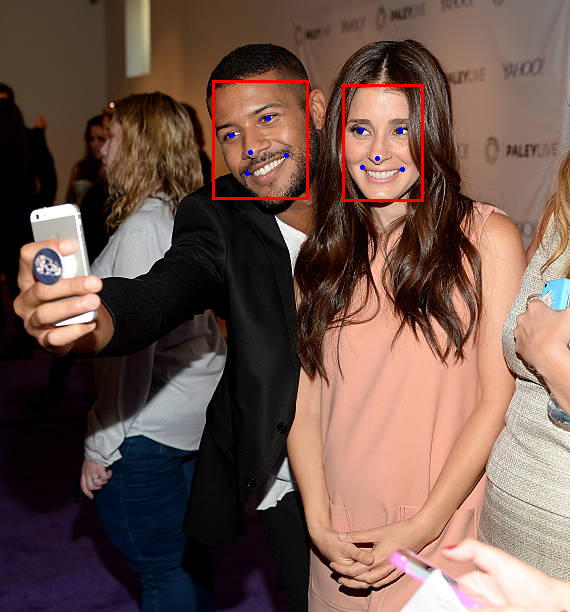

In [47]:
rad = 2
frame_draw = img.copy()
draw = ImageDraw.Draw(frame_draw)
for box, points in zip(boxes, landmarks):
    for landmark in points:
        draw.ellipse((landmark[0]-rad, landmark[1]-rad, landmark[0]+rad, landmark[1]+rad), fill=(0, 0, 255))
    draw.rectangle(box, outline=(255, 0, 0), width=3) # box = (x1, y1, x2, y2)
frame_draw

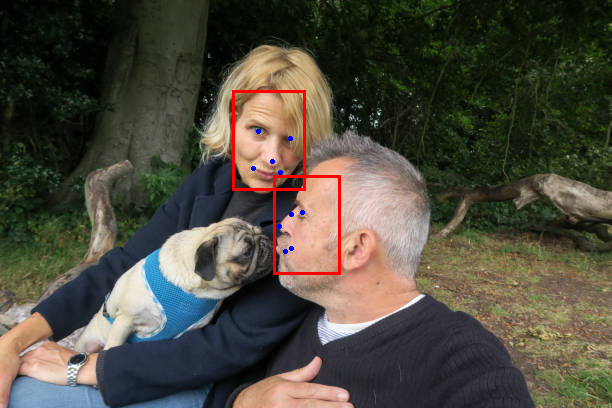

In [44]:
rad = 2
frame_draw = img.copy()
draw = ImageDraw.Draw(frame_draw)
for box, points in zip(boxes, landmarks):
    for landmark in points:
        draw.ellipse((landmark[0]-rad, landmark[1]-rad, landmark[0]+rad, landmark[1]+rad), fill=(0, 0, 255))
    draw.rectangle(box, outline=(255, 0, 0), width=3) # box = (x1, y1, x2, y2)
frame_draw

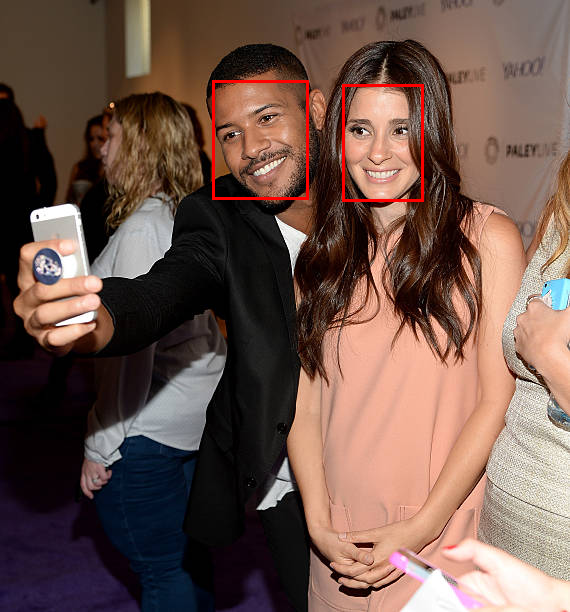

In [3]:
frame_draw = img.copy()
draw = ImageDraw.Draw(frame_draw)
for box in boxes:
    draw.rectangle(box, outline=(255, 0, 0), width=3) # box = (x1, y1, x2, y2)
frame_draw

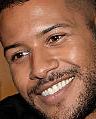

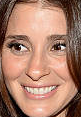

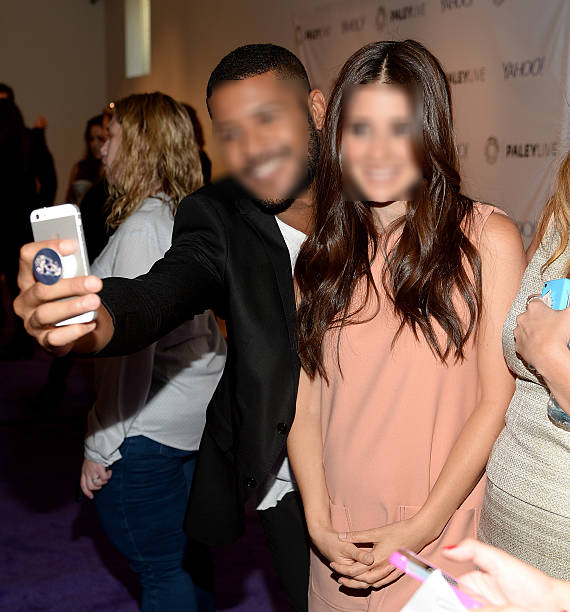

In [4]:
img_blurred = np.array(img.copy())
for box in boxes:
    x1, y1, x2, y2 = box
    face = img_blurred[y1:y2, x1:x2]
    face_img = Image.fromarray(face)
    display(face_img)
    pil_img = Image.fromarray(face)
    blurred_face = pil_img.filter(ImageFilter.BoxBlur(5))
    img_blurred[y1:y2, x1:x2] = np.array(blurred_face)
Image.fromarray(img_blurred)

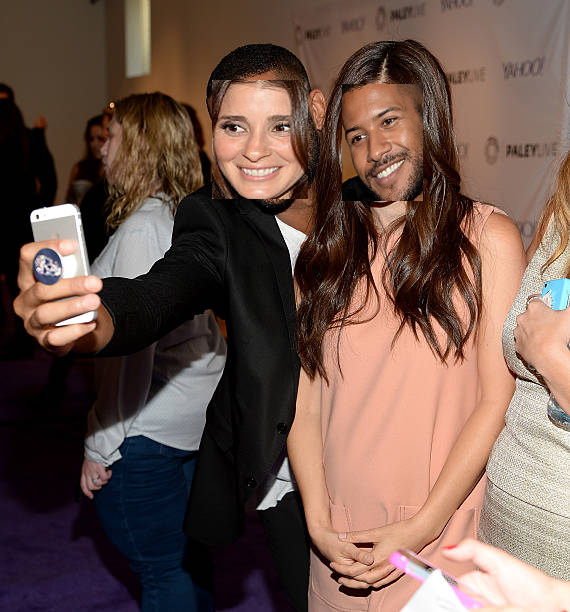

In [5]:
generated = []
img_blurred = np.array(img.copy())
for box in boxes:
    x1, y1, x2, y2 = box
    face = img_blurred[y1:y2, x1:x2]
    face_img = Image.fromarray(face)
    generated.append(face_img)
generated = list(reversed(generated))

for box, gen in zip(boxes, generated):
    x1, y1, x2, y2 = box
    face = Image.fromarray(img_blurred[y1:y2, x1:x2])
    img_blurred[y1:y2, x1:x2] = np.array(gen.resize(face.size))
Image.fromarray(img_blurred)

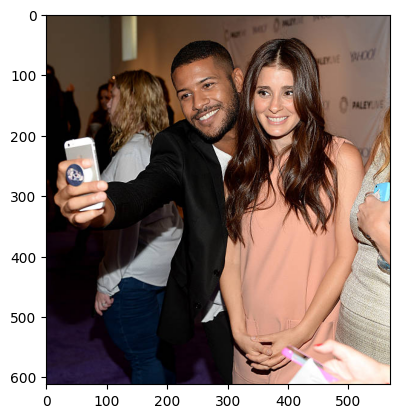

In [7]:
image = cv2.imread('facial-img-1.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)